# Exploration des différents modèles (pour la classification des déplacements avec un seul bras)

L'idée de ce notebook est de faire une exploration rapide de différents modèles pour conserver les plus prometteurs et de les étudier plus précisément ensuite.

### Modèles étudiés
- **Random Forest**
- **Gradient Boosting**
- **SVM**
- **KNN**
- **Régression Linéaire, Logistique ...**
- **ANN** (Keras)

### Récupération des données

In [1]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.utils import shuffle
import joblib

data = pd.read_csv('../preprocessing_one_arm_data/move_preprocess.csv')

X = data.drop('action', axis=1)
y = data['action']

le = LabelEncoder()
y = le.fit_transform(y)

X_shuffled, y_shuffled = shuffle(X, y, random_state=42)


Comme cette étape ne concerne que l'exploration des résultats des différents modèles, on se passe de séparer les données en validation et d'entraînement pour l'instant, on va juste faire une validation croisée.

### Exploration des différents modèles

Training Random Forest...
-> Random Forest result: [0.99203187 0.99070385 0.99335989 0.98937583 0.99069149]
Training Gradient Boosting...
-> Gradient Boosting result: [0.99070385 0.98937583 0.98804781 0.97875166 0.97739362]
Training SVM Linear...
-> SVM Linear result: [0.94289509 0.93891102 0.9561753  0.94289509 0.94680851]
Training SVM RBF...
-> SVM RBF result: [0.9561753  0.937583   0.9561753  0.94023904 0.95212766]
Training SVM Poly...
-> SVM Poly result: [0.96015936 0.96281541 0.96547145 0.95883134 0.96409574]
Training SVM Sigmoid...
-> SVM Sigmoid result: [0.25099602 0.26958831 0.26294821 0.24701195 0.26595745]
Training KNN...
-> KNN result: [0.9747676  0.97343958 0.9814077  0.97343958 0.98138298]
Training KNN Cosine...
-> KNN Cosine result: [0.96812749 0.97742364 0.97875166 0.97742364 0.98271277]
Training Logistic Regression...
-> Logistic Regression result: [0.937583   0.9309429  0.94953519 0.93625498 0.93882979]
Training SGD Classifier...
-> SGD Classifier result: [0.90836653 0

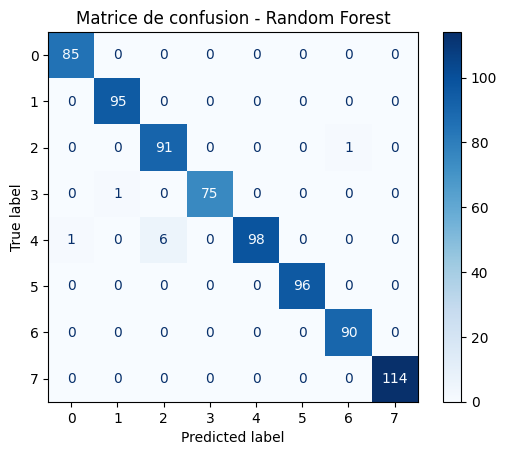

Gradient Boosting: scores = [0.99070385 0.98937583 0.98804781 0.97875166 0.97739362]

Modèle: Gradient Boosting


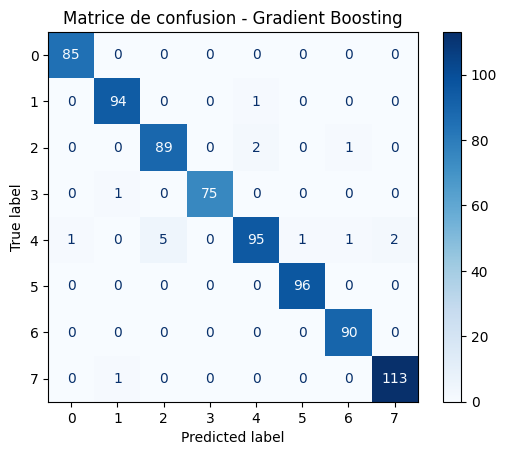

KNN Cosine: scores = [0.96812749 0.97742364 0.97875166 0.97742364 0.98271277]

Modèle: KNN Cosine


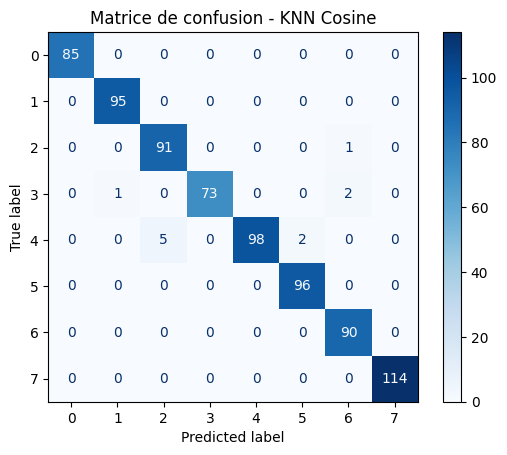


=== Random Forest Feature Importances ===
1. Feature 20: 0.1121
2. Feature 18: 0.1097
3. Feature 23: 0.1096
4. Feature 19: 0.1062
5. Feature 17: 0.1052

=== Gradient Boosting Feature Importances ===
1. Feature 20: 0.1825
2. Feature 18: 0.1474
3. Feature 15: 0.1428
4. Feature 23: 0.1278
5. Feature 16: 0.1264


In [2]:
from explore_models import explore_models

top3, best_model = explore_models(X_shuffled, y_shuffled)

In [3]:
le.classes_

array(['ARRIERE', 'AVANT', 'DROITE', 'GAUCHE', 'NEUTRE', 'SURPRISE',
       'TOURNER_DROITE', 'TOURNER_GAUCHE'], dtype=object)

# Dowload the best model (temporary)


In [4]:
import os

os.makedirs('../models_one_arm', exist_ok=True)

joblib.dump(best_model, '../models_one_arm/best_model_one_arm_move.pkl')
joblib.dump(le, "../models_one_arm/label_encoder_one_arm_move.pkl")

['../models_one_arm/label_encoder_one_arm_move.pkl']

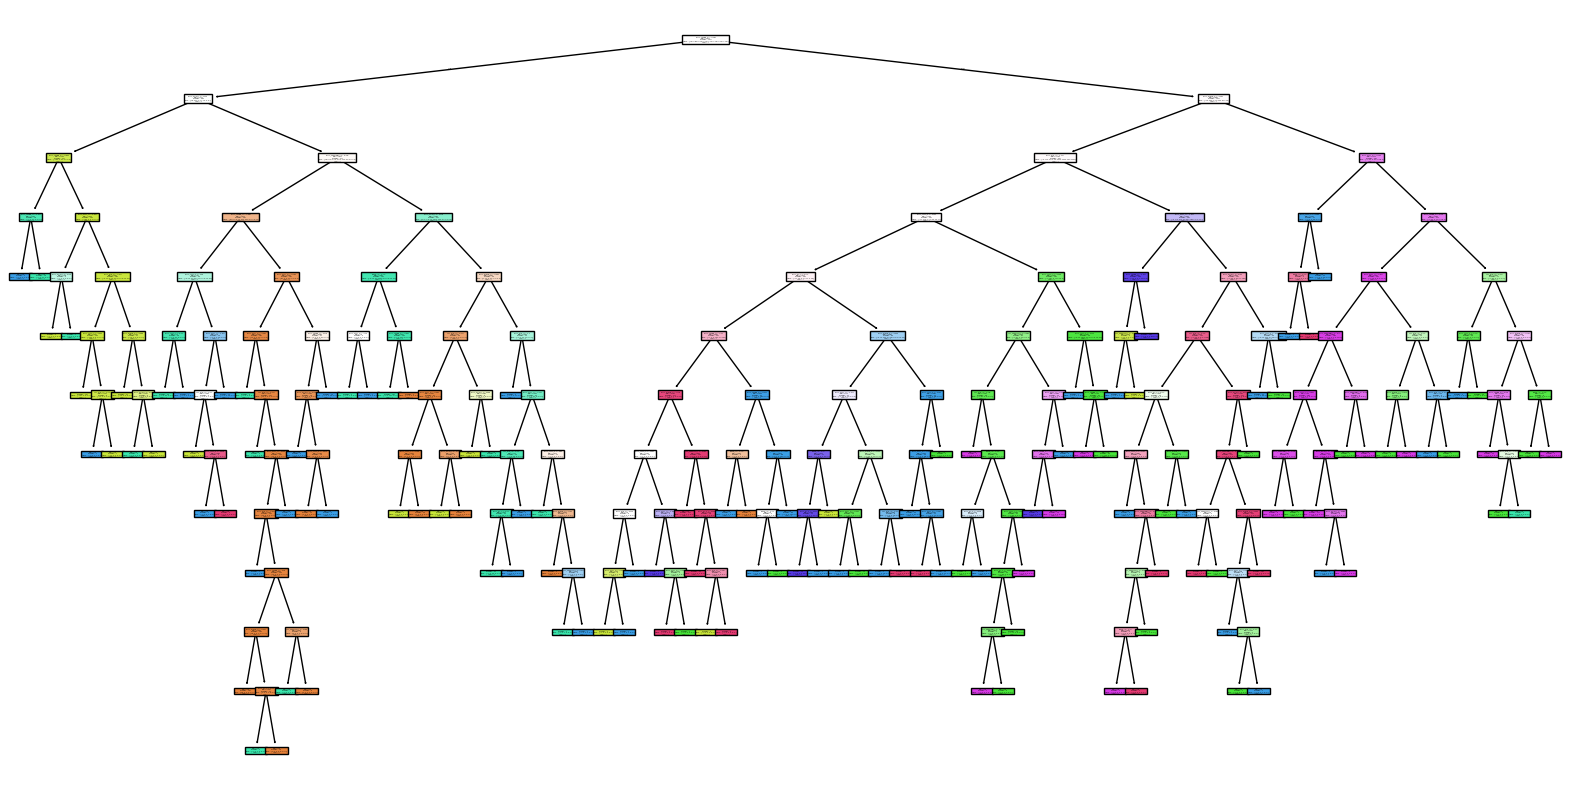

In [7]:
arbre = best_model.estimators_[0]

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import numpy as np

plt.figure(figsize=(20,10))
plot_tree(arbre, filled=True, feature_names=X.columns, class_names=np.unique(y).astype(str))
plt.show()